# Análise Exploratória dos dados 

Neste notebook será feita a análise exploratória dos dados. Temos a descrição das variáveis presentes na folha 'Data' do arquivo excel extraído:


|                |                                                            |
|----------------|------------------------------------------------------------|
|Month	         | Mês do vôo                                                 |
|Scheduled       | Linha Área                                                 |
|Country to/from | País de Origem/Destino                                     |
|Passengers In	 | Quantidade de Passageiros entrantes na Australia           |
|Freight In	     | Fretes entrantes na Austrália, em toneladas                |
|Mail In	     | Correios entrates na Austrália, em toneladas               |
|Passengers Out	 | Quantidade de Passageiros saindo da Australia              |
|Freight Out	 | Fretes saindo da Austrália, em toneladas                   |
|Mail Out	     | Correio saindo da Ausrália, em toneladas                   | 

O foco da análise será principalmente na variável *Passangers In*, analisando suas características. Serão analisadas também todas as outras variáveis quantitativas.  

Os problemas descritos em *Data Issues* não serão abordados aqui

In [262]:
# Importação dos dados
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Criação de uma pasta para armazenamento das imagens
if not os.path.exists('Images/'):
    os.makedirs('Images/')
    
################ AVISOS
import warnings
warnings.filterwarnings("ignore")
########## Comentar caso queira ver os aviso
# Inseri esta linha pois já tenho ciência de todos os avisos presentes neste notebook

file = 'international_airline_activity_table1_2009tocurrent_1221.xlsx'
sheet = 'Data'
df = pd.read_excel(file,sheet)

df.head(10)

C:\Users\pedro\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Month,Scheduled Operator,Country to/from,Passengers In,Freight In,Mail In,Passengers Out,Freight Out,Mail Out,Year,"<< This year is based on the month selected in cell H2 in sheet ""Totals"" - it is only a calendar year if the month in sheet ""Totals"" is set to December"
0,2009-01-01,Aerolineas Argentinas,Argentina,3021,4.313,0.6,1959,8.311,0,2009,NaN
1,2009-01-01,Aerolineas Argentinas,New Zealand,627,76.26,0,1821,68.539,0,2009,NaN
2,2009-01-01,Air Caledonie,New Caledonia,6658,4.918,0.645,5365,68.621,1.291,2009,NaN
3,2009-01-01,Air Canada,Canada,7489,174.828,0.004,6424,105.191,0.016,2009,NaN
4,2009-01-01,Air China,China,12458,201.314,18.569,11163,142.408,2.93,2009,NaN
5,2009-01-01,Air Mauritius,Mauritius,4635,36.586,0.429,3782,80.174,0.004,2009,NaN
6,2009-01-01,Air New Zealand,Cook Islands,94,0,0,39,0,0,2009,NaN
7,2009-01-01,Air New Zealand,Germany,..,1.136,0,..,..,..,2009,NaN
8,2009-01-01,Air New Zealand,New Zealand,109904,1811.254,197.664,100460,1385.565,8.268,2009,NaN
9,2009-01-01,Air New Zealand,USA,..,164.046,0,..,..,..,2009,NaN


In [283]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


## Tratamento dos dados
Vemos uma série de modificações necessárias: 
- Remoção da Última Coluna 
- Tratamento de valores não registrados 

In [263]:
# Remover ultima coluna
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

In [264]:
# Remover amostras onde o número de passageiro, email e  não foi registrado
# 
df.loc[df['Passengers In'] == '..', 'Passengers In'] = 0
df.loc[df['Passengers Out'] == '..', 'Passengers Out'] = 0

# Freight
df.loc[df['Freight In'] == '..', 'Freight In'] = 0
df.loc[df['Freight Out'] == '..', 'Freight Out'] = 0

# Mail in 
df.loc[df['Mail In'] == '..', 'Mail In'] = 0
df.loc[df['Mail Out'] == '..', 'Mail Out'] = 0

# Conferir as mudanças 
df.head(10)

,Month,Scheduled Operator,Country to/from,Passengers In,Freight In,Mail In,Passengers Out,Freight Out,Mail Out,Year
0,2009-01-01,Aerolineas Argentinas,Argentina,3021,4.313,0.6,1959,8.311,0,2009
1,2009-01-01,Aerolineas Argentinas,New Zealand,627,76.26,0,1821,68.539,0,2009
2,2009-01-01,Air Caledonie,New Caledonia,6658,4.918,0.645,5365,68.621,1.291,2009
3,2009-01-01,Air Canada,Canada,7489,174.828,0.004,6424,105.191,0.016,2009
4,2009-01-01,Air China,China,12458,201.314,18.569,11163,142.408,2.93,2009
5,2009-01-01,Air Mauritius,Mauritius,4635,36.586,0.429,3782,80.174,0.004,2009
6,2009-01-01,Air New Zealand,Cook Islands,94,0,0,39,0,0,2009
7,2009-01-01,Air New Zealand,Germany,0,1.136,0,0,0,0,2009
8,2009-01-01,Air New Zealand,New Zealand,109904,1811.254,197.664,100460,1385.565,8.268,2009
9,2009-01-01,Air New Zealand,USA,0,164.046,0,0,0,0,2009


Faremos também a conversão dos países de origem/destino para o respectivo continente. Será necessário fazer a correção da nomeclatura dos países para que sigam o padrão da ISO3166, que define os códigos de cada país e continente. Os países da coluna 'Country to/from' serão alocados para um dos 6 continentes, descartando a Antártida, e separando a América entre América do Norte e América do Sul:

- América do Norte
- América do Sul
- Asia
- Oceania
- África
- Europa

Estes continentes serão salvos em uma nova coluna *'Continentes'*.

In [265]:
# Convert pais para a coluna

import pycountry_convert as pc

# Fazer as correcoes necessarias conforme a ISO 3166
df.loc[df['Country to/from'] == 'Tahiti', 'Country to/from'] = 'French Polynesia'
df.loc[df['Country to/from'] == 'Korea', 'Country to/from'] = 'Korea, Republic of'
df.loc[df['Country to/from'] == 'UK', 'Country to/from'] = 'United Kingdom'
df.loc[df['Country to/from'] == 'Hong Kong (SAR)', 'Country to/from'] = 'Hong Kong'
df.loc[df['Country to/from'] == 'Western Samoa', 'Country to/from'] = 'Samoa'
df.loc[df['Country to/from'] == 'Reunion', 'Country to/from'] = 'Réunion'

# Pegar lista de países unícos 
country_list = df['Country to/from'].unique()

# Lista de continentes 
continent_list = {
    'NA': 'América do Norte',
    'SA': 'América do Sul', 
    'AS': 'Asia',
    'OC': 'Oceania',
    'AF': 'África',
    'EU': 'Europa'
}
continents = {}
for country in country_list:
    cont_code = pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    continents[country] = continent_list[cont_code]

# Adicionar uma coluna continentes
df['Continentes'] = df['Country to/from'].replace(continents)
df.head()

,Month,Scheduled Operator,Country to/from,Passengers In,Freight In,Mail In,Passengers Out,Freight Out,Mail Out,Year,Continentes
0,2009-01-01,Aerolineas Argentinas,Argentina,3021,4.313,0.6,1959,8.311,0,2009,América do Sul
1,2009-01-01,Aerolineas Argentinas,New Zealand,627,76.26,0,1821,68.539,0,2009,Oceania
2,2009-01-01,Air Caledonie,New Caledonia,6658,4.918,0.645,5365,68.621,1.291,2009,Oceania
3,2009-01-01,Air Canada,Canada,7489,174.828,0.004,6424,105.191,0.016,2009,América do Norte
4,2009-01-01,Air China,China,12458,201.314,18.569,11163,142.408,2.93,2009,Asia


In [266]:
# Conversão das variáveis para float

df['Passengers In'] = df['Passengers In'].astype('float')
df['Passengers Out'] = df['Passengers Out'].astype('float') 

df['Freight In'] = df['Freight In'].astype('float')
df['Freight Out'] = df['Freight Out'].astype('float') 

df['Mail In'] = df['Mail In'].astype('float')
df['Mail Out'] = df['Mail Out'].astype('float') 



## Visualização do Fluxo de Passageiros

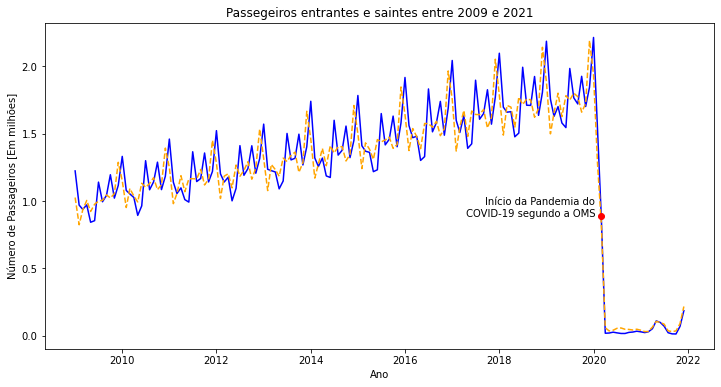

In [280]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from datetime import datetime


# Passageiros In por mês
passIn = df.groupby('Month')['Passengers In'].sum()/1e6

# Passageiros out por mês
passOut = df.groupby('Month')['Passengers Out'].sum()/1e6


# PLOTTING
fig, ax = plt.subplots(figsize = (12,6))    

ax.plot(passIn.index, passIn.values, color = 'b')
ax.plot(passOut.index, passOut.values, color = 'orange', linestyle='--')

#sns.lineplot(x='Month', y='Passengers_In', data = passFlow,
            #color='b')
#sns.lineplot(x='Month', y='Passengers_Out', data = passFlow,
            #color='r',linestyle='--')
plt.title('Passegeiros entrantes e saintes entre 2009 e 2021')
plt.xlabel('Ano')
plt.ylabel('Número de Passageiros [Em milhões]')


# Anotar Início da pandemia no plot (11/03/2020)
# Marcar pandemia
pandemia_start = datetime.strptime('2020-03-01','%Y-%m-%d')
pandemia_loc = passIn.index.get_loc(pandemia_start)
nl = '\n'

ax.plot(passIn.index[pandemia_loc],passIn.values[pandemia_loc],marker='o',color='r')
ax.text(passIn.index[pandemia_loc],
        passIn.values[pandemia_loc],
        f'Início da Pandemia do  {nl} COVID-19 segundo a OMS  ',
        horizontalalignment='right')
plt.savefig('Images/PassangersFlow.jpeg')
plt.show()



Observa-se uma tendência linear de aumento do fluxo de passageiros ao decorrer dos anos. Nota-se também a presença de sazonalidade, o fluxo de passageiros segue certos padrões, que se repetem todo ano. Devido á pandemia de COVID-19, houve uma brusca quebra desse regime. A Austrália foi um dos países que fechou suas fronteiras, então essa queda tanto em passageiros que entram quanto que saem é explicável. Agora com a flexibilização das medidas de contenção do vírus, vemos uma retomada de viagens internacionais. 

Os anos de 2020 e 2021 serão retirados desta análise pois correspondem a um *outlier*, uma situação descrepante em relação á normalidade do restante dos dados. 

Text(0, 0.5, 'Número de Passageiros [Em milhões]')

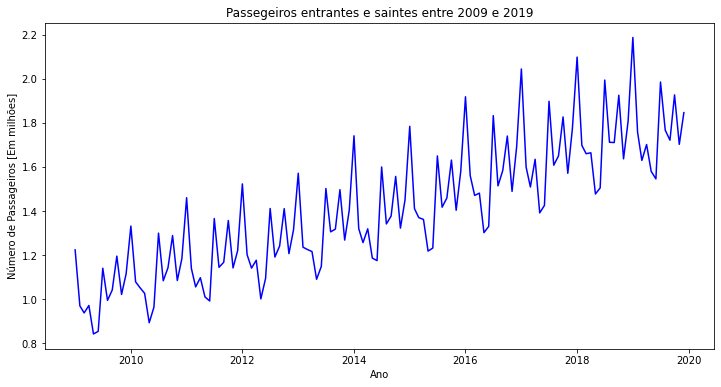

In [268]:
# Filtrar antes de 2020
df2019 = df[df["Month"] < '2020-01-01'].copy()

# Passageiros In por mês
passIn = df2019.groupby('Month')['Passengers In'].sum()/1e6
# Passageiros out por mês
passOut = df2019.groupby('Month')['Passengers Out'].sum()/1e6

fig, ax = plt.subplots(figsize = (12,6))    
#
ax.plot(passIn.index, passIn.values, color = 'b')

#sns.lineplot(x='Month', y='Passengers_In', data = passFlow,
            #color='b')
#sns.lineplot(x='Month', y='Passengers_Out', data = passFlow,
            #color='r',linestyle='--')
plt.title('Passegeiros entrantes e saintes entre 2009 e 2019')
plt.xlabel('Ano')
plt.ylabel('Número de Passageiros [Em milhões]')


## Análise da sazonalidade 
Para analisar a sazonalidade da entrada e saída de passageiros, iremos visualizar o fluxo de passageiros mensal, para cada ano contemplado nesta coletagem de dados. Desta forma é possível identificar as tendências que se repetem anualmente.

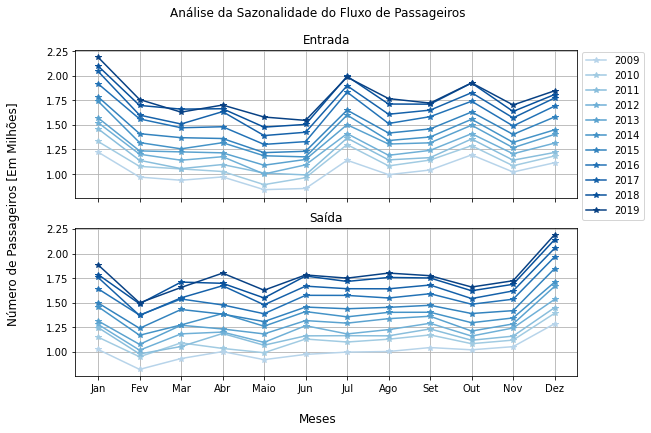

In [281]:
# Conversão do tipo de variavel das colunas

# Variaveis de auxilio - Indice do mês
df_normal = df2019.copy()
df_normal.loc[:,"month_idx"] = df_normal['Month'].dt.month

meses = ['Jan','Fev','Mar','Abr','Maio','Jun','Jul','Ago','Set','Out','Nov','Dez']

# Agrupar por mês e ano
passIn_seasonal = df_normal.groupby(['month_idx','Year'])['Passengers In'].sum()/1e6
passIn_seasonal = passIn_seasonal.reset_index().pivot('month_idx','Year','Passengers In')

passOut_seasonal = df_normal.groupby(['month_idx','Year'])['Passengers Out'].sum()/1e6
passOut_seasonal = passOut_seasonal.reset_index().pivot('month_idx','Year','Passengers Out')


# Definir colormap
from matplotlib import cm

colors = cm.Blues(np.linspace(0.3,1,len(passIn_seasonal)))

# Criar figura com o subplot
fig, axs = plt.subplots(nrows=2,ncols=1,
                        sharex=True, sharey=True,
                        figsize=(9,6))

# sazonalidade da entrada de passageiros
passIn_seasonal.plot(marker='*',color=colors, ax = axs[0])
axs[0].legend(bbox_to_anchor=(1, 1.02), loc='upper left')
axs[0].grid()
axs[0].set_title('Entrada')

# Sazonalidade da saída de passageiros
passOut_seasonal.plot(marker='*',color=colors, ax = axs[1])
axs[1].grid()
axs[1].set_xlabel('')
axs[1].get_legend().remove()
axs[1].set_title('Saída')

# Mudar os índices para nome do mês
axs[1].set_xticks(axs[1].lines[0].get_xdata())
axs[1].set_xticklabels(meses)

fig.suptitle('Análise da Sazonalidade do Fluxo de Passageiros')
fig.supylabel('Número de Passageiros [Em Milhões]')
fig.supxlabel('Meses')
plt.savefig('Images/PassengersIn_season.jpeg')
plt.show()


Identificamos movimentos sazonais que se repetem ao longo dos 10 anos analizados, seguindo também a tendência de aumento do número de passageiros. No mês de Janeiro temos um fluxo de entrada de passageiros maior, quando comparado ao restante dos meses. Isto deve-se possivelmente por conta das festas de final de ano, como Natal e Ano Novo, onde muitas pessoas costumam tirar férias e viajar, retornando apenas em Janeiro do ano seguinte. 

De Janeiro a Junho o fluxo de passageiros entrantes diminui suavemente, até que em Julho observa-se um outro pico de entrada no páis. Este comportamento se repete em Agosto e Setembro, com picos em Outubro e posteriormente em Dezembro. 

Nos meses de Dezembro temos também o maior número de passageiros que saem do país, possivelmente por conta das festas de final de ano. Entre Janeiro e Maio há uma flutuação maior neste número, que se atenua a partir de Junho. O efeito destas sazonalidades aparentam se tornar mais expressivos ao decorrer dos anos.

### Análise sazonalidade do frete
Analisaremos também a sazonalidade do frete e correios que entram e saem do país, da mesma forma que fizemos anteriormente

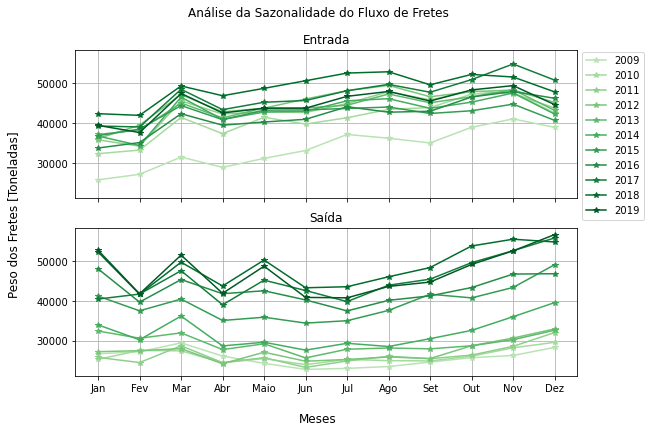

In [270]:
# Agrupar por mês e ano
FreightIn_seasonal = df_normal.groupby(['month_idx','Year'])['Freight In'].sum()
FreightIn_seasonal = FreightIn_seasonal.reset_index().pivot('month_idx','Year','Freight In')

FreightOut_seasonal = df_normal.groupby(['month_idx','Year'])['Freight Out'].sum()
FreightOut_seasonal = FreightOut_seasonal.reset_index().pivot('month_idx','Year','Freight Out')

# Definir colormap
colors = cm.Greens(np.linspace(0.3,1,len(FreightIn_seasonal)))

# Criar figura com o subplot
fig, axs = plt.subplots(nrows=2,ncols=1,
                        sharex=True, sharey=True,
                        figsize=(9,6))

# sazonalidade da entrada de fretes
FreightIn_seasonal.plot(marker='*',color=colors, ax = axs[0])
axs[0].legend(bbox_to_anchor=(1, 1.02), loc='upper left')
axs[0].grid()
axs[0].set_title('Entrada')

# Sazonalidade da saída da frete
FreightOut_seasonal.plot(marker='*',color=colors, ax = axs[1])
axs[1].grid()
axs[1].set_xlabel('')
axs[1].get_legend().remove()
axs[1].set_title('Saída')

# Mudar os índices para nome do mês
axs[1].set_xticks(axs[1].lines[0].get_xdata())
axs[1].set_xticklabels(['Jan','Fev','Mar','Abr','Maio','Jun','Jul','Ago','Set','Out','Nov','Dez'])


fig.suptitle('Análise da Sazonalidade do Fluxo de Fretes')
fig.supylabel('Peso dos Fretes [Toneladas]')
fig.supxlabel('Meses')

plt.show()


Observamos flutuações da quantidade de frete, principalmente do frete que sai do país, nos primeiros 6 meses do ano. No segundo semestre, no entanto, a série apresenta um comportamento de crescimento linear. 

Há também um contraste em Dezembro, onde a quantidade de frete entrante é menor do que no mês anterior, enquanto os fretes que saem são maiores neste mês. Assim como o número de passageiros, a quantidade de frete transportada aumenta a cada ano que passo.

### Análise da sazonalidade dos correios

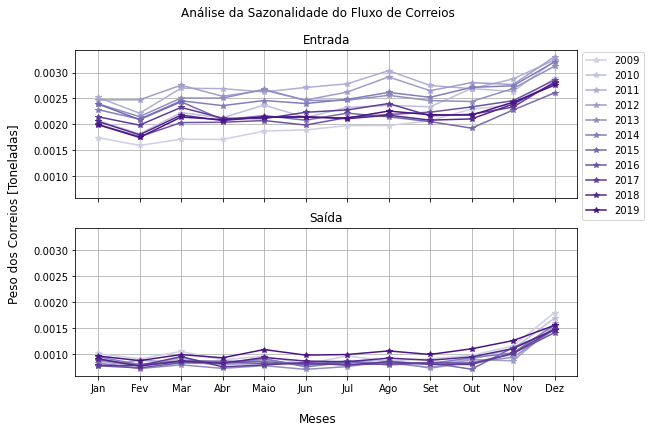

In [271]:
# Agrupar por mês e ano
MailIn_seasonal = df_normal.groupby(['month_idx','Year'])['Mail In'].sum()/1e6
MailIn_seasonal = MailIn_seasonal.reset_index().pivot('month_idx','Year','Mail In')

MailOut_seasonal = df_normal.groupby(['month_idx','Year'])['Mail Out'].sum()/1e6
MailOut_seasonal = MailOut_seasonal.reset_index().pivot('month_idx','Year','Mail Out')

# Definir colormap
colors = cm.Purples(np.linspace(0.3,1,len(MailIn_seasonal)))

# Criar figura com o subplot
fig, axs = plt.subplots(nrows=2,ncols=1,
                        sharex=True, sharey=True,
                        figsize=(9,6))

# sazonalidade da entrada de correios
MailIn_seasonal.plot(marker='*',color=colors, ax = axs[0])
axs[0].legend(bbox_to_anchor=(1, 1.02), loc='upper left')
axs[0].grid()
axs[0].set_title('Entrada')

# Sazonalidade da saída de correios
MailOut_seasonal.plot(marker='*',color=colors, ax = axs[1])
axs[1].grid()
axs[1].set_xlabel('')
axs[1].get_legend().remove()
axs[1].set_title('Saída')

# Mudar os índices para nome do mês
axs[1].set_xticks(axs[1].lines[0].get_xdata())
axs[1].set_xticklabels(['Jan','Fev','Mar','Abr','Maio','Jun','Jul','Ago','Set','Out','Nov','Dez'])

fig.suptitle('Análise da Sazonalidade do Fluxo de Correios')
fig.supylabel('Peso dos Correios [Toneladas]')
fig.supxlabel('Meses')

plt.show()

Ao contrário das duas outras variáveis analisadas, a quantidade de correio transportado por companhias áreas não apresenta um aumento significativo á medida que os anos passam.

Os correios entrantes apresentavam uma certa flutuação ao longo dos meses, que vem diminuindo cada vez mais nos anos recentes, se tornando quase constante, com apenas um aumento significativo em Novembro e Dezembro.

A mesma situação é observada nos correios que saem do país.


## Fluxo de passageiros por ano por continente 
Iremos analisar quais os continentes mais visitados e quais têm o maior número de visitantes que vêm para Austrália, e quais os destinos mais comuns dos passageiros que saem. Esta análise será feita por continente e não por país

Text(0.02, 0.5, 'Número de passageiros [Em Milhões]')

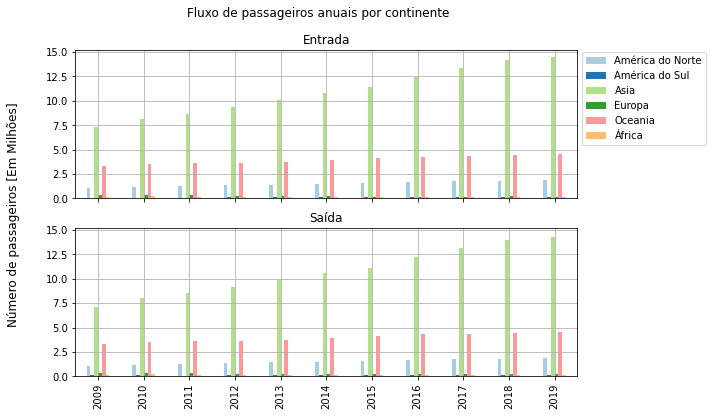

In [272]:
passIn_origin = df_normal.groupby(['Year','Continentes'])['Passengers In'].sum()/1e6
passIn_origin = passIn_origin.reset_index().pivot('Year','Continentes','Passengers In')

passOut_dentin = df_normal.groupby(['Year','Continentes'])['Passengers Out'].sum()/1e6
passOut_dentin = passOut_dentin.reset_index().pivot('Year','Continentes','Passengers Out')


# Criar figura com o subplot
fig, axs = plt.subplots(nrows=2,ncols=1,
                        sharex=True, sharey=True,
                        figsize=(9,6))

colors = cm.Paired(np.linspace(0,1,len(passIn_origin)))

# sazonalidade da entrada de passageiros
passIn_origin.plot(kind='bar',color=colors, ax = axs[0])
axs[0].legend(bbox_to_anchor=(1, 1.02), loc='upper left')
axs[0].grid()
axs[0].set_title('Entrada')

# Sazonalidade da saída de passageiros
passOut_dentin.plot(kind='bar',color=colors, ax = axs[1])
axs[1].grid()
axs[1].set_xlabel('')
axs[1].get_legend().remove()
axs[1].set_title('Saída')

fig.suptitle('Fluxo de passageiros anuais por continente')
fig.supylabel('Número de passageiros [Em Milhões]')

A Ásia se mostrou o continente com maior número de passageiros que entram e saem da Austrália. Isto se deve na verdade pela forma de coleta dos dados. Um vôo entrante tem como país de origem apenas o trajeto que entra de fato na Austrália, não considerando que este se trata apenas de uma conexão por alguns passageiros. 

Uma análise mais detalhada deveria ser feita sobre a origem e destino final de cada passageiro individual, para que esta análise represente a realidade de forma mais coerente. 

## Análise da correlação entre as variáveis 

A correlação é medida aqui com o coeficiente de correlação de Pearson, que mede a correlação entre duas variáveis quantitativas. Assim sendo, as variáveis categóricas não serão usadas aqui. 

Esta análise pode fornecer informações sobre séries que seguem uma mesma tendência juntas, ou seja, á medida que uma aumenta, a outra aumenta também (Correlação Positiva) ou uma decresce com o aumento da outra (Correlação negativa).

Isto pode ser útil para selecionar variáveis que possam ajudar a explicar a série temporal a ser estimada. 

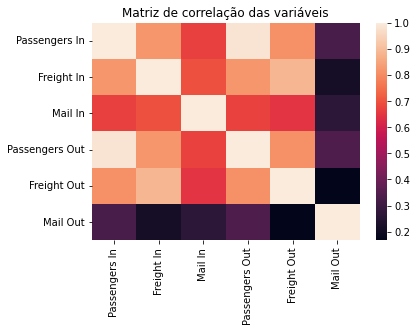

In [282]:
d_cor = df_normal[['Passengers In', 'Freight In', 'Mail In','Passengers Out', 'Freight Out', 'Mail Out']].corr()
sns.heatmap(d_cor);
plt.title('Matriz de correlação das variáveis')
plt.savefig('Images/corr_matrix.jpeg')
plt.show()

Vemos que todas as variáveis, com a exceção do correio que sai do país, são correlacionadas positivamente entre si, com coeficientes acima de 0.7. Isto indica que, um aumento em uma delas, por exemplo, no número de passageiros entrantes, indicaria um aumento de todas as outras.

In [274]:
# Salvar os dados em formato csv
data = df_normal[['Month','Passengers In', 'Freight In', 'Passengers Out', 'Freight Out']]

if os.path.exists('ProcessedData/'):
    df_normal.to_csv('ProcessedData/airline_2009_2019.csv')
    data.to_csv('ProcessedData/data.csv')
else:
    os.makedirs('ProcessedData/')
    df_normal.to_csv('ProcessedData/airline_2009_2019.csv')
    data.to_csv('ProcessedData/data.csv')
    